In [1]:
# Load necessary packages
import pandas as pd
import seaborn as sns
import umap
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from scipy.spatial import distance_matrix
import numpy as np
from scipy.stats import fisher_exact, ttest_ind


2025-08-13 16:52:39.192983: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/easybuild/software/Python/3.10.4-GCCcore-11.3.0/lib:/cm/shared/easybuild/software/OpenSSL/1.1/lib:/cm/shared/easybuild/software/libffi/3.4.2-GCCcore-11.3.0/lib64:/cm/shared/easybuild/software/GMP/6.2.1-GCCcore-11.3.0/lib:/cm/shared/easybuild/software/XZ/5.2.5-GCCcore-11.3.0/lib:/cm/shared/easybuild/software/SQLite/3.38.3-GCCcore-11.3.0/lib:/cm/shared/easybuild/software/Tcl/8.6.12-GCCcore-11.3.0/lib:/cm/shared/easybuild/software/libreadline/8.1.2-GCCcore-11.3.0/lib:/cm/shared/easybuild/software/ncurses/6.3-GCCcore-11.3.0/lib:/cm/shared/easybuild/software/bzip2/1.0.8-GCCcore-11.3.0/lib:/cm/shared/easybuild/software/binutils/2.38-GCCcore-11.3.0/lib:/cm/shared/easybuild/software/zlib/1.2.12-GCCcore-11.3.0/lib:/cm/shared/easybuild/softw

## N-Orbit

In [2]:
# Load N-Orbit Distance Matrix
dists = pd.read_csv("/mnt/isilon/tan_lab/xiongb/NOrbitRevision/intermediates/SyntheticV1/neighborhood_distance_matrix.csv", index_col=0)
dists

,A0_A1,A0_B2,A0_C1,A10_A1,A10_B2,A10_C1,A11_A1,A11_B2,A11_C1,A12_A1,...,B6_C2,B7_A2,B7_B1,B7_C2,B8_A2,B8_B1,B8_C2,B9_A2,B9_B1,B9_C2
A0_A1,0.000000,3.504208,2.189833,0.217226,3.434707,2.162551,0.552500,3.064912,2.308604,0.591326,...,3.279562,1.775843,4.444572,3.643323,1.284829,4.273398,3.025934,1.523735,4.152547,3.330770
A0_B2,3.504208,0.000000,3.884898,3.534193,0.235550,3.745315,3.686681,0.508415,3.904732,3.814194,...,4.562438,4.778719,1.677448,5.156199,4.567705,1.566274,4.688811,4.606611,1.655424,4.843646
A0_C1,2.189833,3.884898,0.000000,2.283828,3.812359,0.379207,2.474004,3.481151,0.356515,2.423357,...,1.811344,3.447625,4.666354,1.715105,3.206611,4.495180,1.627716,3.385517,4.374329,1.492552
A10_A1,0.217226,3.534193,2.283828,0.000000,3.466204,2.257340,0.465271,3.091482,2.397766,0.507735,...,3.343307,1.679589,4.448318,3.687068,1.328575,4.277143,3.069680,1.427480,4.156293,3.374515
A10_B2,3.434707,0.235550,3.812359,3.466204,0.000000,3.628804,3.617836,0.442398,3.789654,3.744737,...,4.441863,4.708145,1.606874,5.035624,4.497130,1.455699,4.618236,4.536036,1.534849,4.723071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B8_B1,4.273398,1.566274,4.495180,4.277143,1.455699,4.392739,4.446262,1.664516,4.428357,4.567485,...,3.196293,3.489270,0.363696,3.790729,3.232974,0.000000,3.357935,3.287167,0.214078,3.484633
B8_C2,3.025934,4.688811,1.627716,3.069680,4.618236,1.655270,3.428799,4.287053,1.680894,3.460021,...,0.354087,2.413898,3.649344,0.665396,1.860449,3.357935,0.000000,2.113985,3.301097,0.363748
B9_A2,1.523735,4.606611,3.385517,1.427480,4.536036,3.443071,1.416599,4.204853,3.438694,1.487822,...,2.372566,0.351971,3.589108,2.704708,0.326745,3.287167,2.113985,0.000000,3.263628,2.381811
B9_B1,4.152547,1.655424,4.374329,4.156293,1.534849,4.201883,4.325412,1.543666,4.237507,4.446635,...,3.086728,3.464912,0.379640,3.659753,3.208912,0.214078,3.301097,3.263628,0.000000,3.389695


In [3]:
# Create UMAP visualization
reducer = umap.UMAP(n_components=2,random_state=0,metric="precomputed")
reduced=reducer.fit_transform(dists.values)
umapDF = pd.DataFrame({"UMAP 1":reduced[:,0], "UMAP 2": reduced[:,1], "image_neighborhood":dists.index})
umapDF["Neighborhood"] = [i.split("_")[1] for i in dists.index]
umapDF["Class"] = [i.split("_")[1].strip("12345") for i in dists.index]
umapDF.to_csv("SyntheticV1_UMAP_NOrbit.csv")

/home/xiongb/.local/lib/python3.10/site-packages/umap/umap_.py:1857: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/home/xiongb/.local/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<AxesSubplot: xlabel='UMAP 1', ylabel='UMAP 2'>

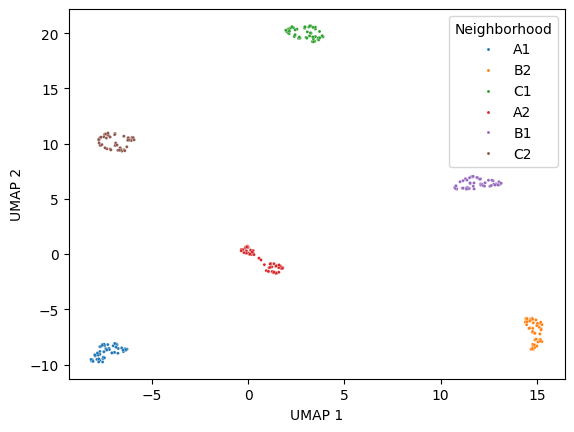

In [4]:
sns.scatterplot(umapDF,x="UMAP 1", y="UMAP 2",hue="Neighborhood",s=5)

In [5]:
# Get long version of distance matrix and label pairs
dists_long = dists.stack().reset_index()
dists_long = dists_long.rename(columns={"level_0":"Instance 1","level_1":"Instance 2",0: "Distance"})
dists_long["Neighborhood 1"] = [i.split("_")[1] for i in dists_long["Instance 1"]]
dists_long["Neighborhood 2"] = [i.split("_")[1] for i in dists_long["Instance 2"]]
dists_long["Same Neighborhood"] = (dists_long["Neighborhood 1"]==dists_long["Neighborhood 2"])
dists_long["Class 1"] = [i.split("_")[1].strip("12") for i in dists_long["Instance 1"]]
dists_long["Class 2"] = [i.split("_")[1].strip("12") for i in dists_long["Instance 2"]]
dists_long["Same Class"] = (dists_long["Class 1"]==dists_long["Class 2"])
dists_long["Sample Type 1"] = [i.split("_")[0][0] for i in dists_long["Instance 1"]]
dists_long["Sample Type 2"] = [i.split("_")[0][0] for i in dists_long["Instance 2"]]
dists_long["Same Sample Type"] = (dists_long["Sample Type 1"]==dists_long["Sample Type 2"])
dists_long["Log Dist"] = np.log10(dists_long["Distance"]+1)
dists_long = dists_long[dists_long["Instance 1"]<dists_long["Instance 2"]]
# Get AUROC across all neighborhood classes
category = []
for index, row in dists_long.iterrows():
    if row["Same Neighborhood"]:
        category.append("SJ")
    elif (not row["Same Neighborhood"]) and (row["Same Class"]):
        category.append("SMDJ")
    else:
        category.append("DM")
dists_long["Relationship"] = category

comp1 = dists_long[dists_long["Relationship"].isin(["SJ","SMDJ"])]
comp2 = dists_long[dists_long["Relationship"].isin(["SMDJ","DM"])]

print(roc_auc_score(comp1["Relationship"], comp1["Distance"]))
print(1-roc_auc_score(comp2["Relationship"], comp2["Distance"]))
print(ttest_ind(comp1[comp1["Relationship"]=="SJ"]["Distance"],
                comp1[comp1["Relationship"]=="SMDJ"]["Distance"],alternative="less"))
print(ttest_ind(comp2[comp2["Relationship"]=="SMDJ"]["Distance"],
                comp2[comp2["Relationship"]=="DM"]["Distance"],alternative="less"))

0.9999064489795918
0.9988863377777778
TtestResult(statistic=-444.4191846200331, pvalue=0.0, df=14848.0)
TtestResult(statistic=-222.68970006067744, pvalue=0.0, df=37498.0)


In [6]:
dists_long

,Instance 1,Instance 2,Distance,Neighborhood 1,Neighborhood 2,Same Neighborhood,Class 1,Class 2,Same Class,Sample Type 1,Sample Type 2,Same Sample Type,Log Dist,Relationship
1,A0_A1,A0_B2,3.504208,A1,B2,False,A,B,False,A,A,True,0.653618,DM
2,A0_A1,A0_C1,2.189833,A1,C1,False,A,C,False,A,A,True,0.503768,DM
3,A0_A1,A10_A1,0.217226,A1,A1,True,A,A,True,A,A,True,0.085371,SJ
4,A0_A1,A10_B2,3.434707,A1,B2,False,A,B,False,A,A,True,0.646865,DM
5,A0_A1,A10_C1,2.162551,A1,C1,False,A,C,False,A,A,True,0.500038,DM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89098,B8_C2,B9_B1,3.301097,C2,B1,False,C,B,False,B,B,True,0.633579,DM
89099,B8_C2,B9_C2,0.363748,C2,C2,True,C,C,True,B,B,True,0.134734,SJ
89398,B9_A2,B9_B1,3.263628,A2,B1,False,A,B,False,B,B,True,0.629779,DM
89399,B9_A2,B9_C2,2.381811,A2,C2,False,A,C,False,B,B,True,0.529149,DM


/home/xiongb/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/xiongb/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/xiongb/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<AxesSubplot: xlabel='Relationship', ylabel='Distance'>

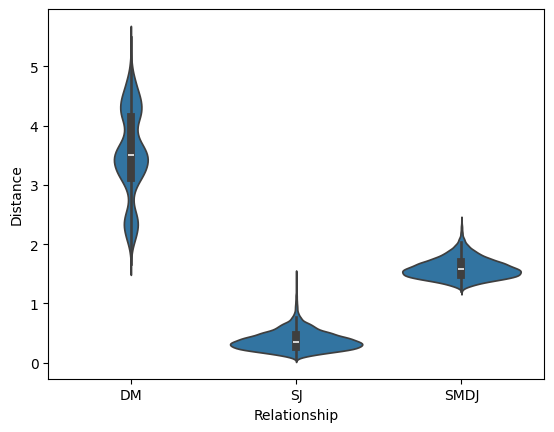

In [7]:
sns.violinplot(dists_long,x="Relationship",y="Distance")

In [8]:
# AUROC within neighborhood classes
for nclass in sorted(set(comp1["Class 1"])):
    comp1_i = comp1[(comp1["Class 1"]==nclass)&(comp1["Class 2"]==nclass)]
    print(nclass, roc_auc_score(comp1_i["Relationship"], comp1_i["Distance"]))
    print(ttest_ind(comp1_i[comp1_i["Relationship"]=="SJ"]["Distance"],
                    comp1_i[comp1_i["Relationship"]=="SMDJ"]["Distance"],alternative="less"))


A 1.0
TtestResult(statistic=-268.43986308407324, pvalue=0.0, df=4948.0)
B 0.9998396734693877
TtestResult(statistic=-239.51012623122395, pvalue=0.0, df=4948.0)
C 1.0
TtestResult(statistic=-296.85073834032937, pvalue=0.0, df=4948.0)


In [9]:
dists_long.to_csv("SyntheticV1_AUROC_NOrbit.csv")

### Image

In [10]:
# Load N-Orbit Distance Matrix
dists_im = pd.read_csv("/mnt/isilon/tan_lab/xiongb/NOrbitRevision/intermediates/SyntheticV1_Image/neighborhood_distance_matrix.csv", index_col=0)
dists_im

,A0_A0,A10_A10,A11_A11,A12_A12,A13_A13,A14_A14,A15_A15,A16_A16,A17_A17,A18_A18,...,B46_B46,B47_B47,B48_B48,B49_B49,B4_B4,B5_B5,B6_B6,B7_B7,B8_B8,B9_B9
A0_A0,0.000000,0.100385,0.091718,0.102730,0.107109,0.112714,0.106643,0.091719,0.138080,0.109271,...,1.323531,1.358851,1.321740,1.396807,1.332739,1.336753,1.350964,1.332305,1.349009,1.346834
A10_A10,0.100385,0.000000,0.101357,0.098946,0.098606,0.121386,0.099965,0.101986,0.126022,0.101295,...,1.338488,1.373808,1.321896,1.411763,1.332895,1.336909,1.370320,1.326462,1.338765,1.352990
A11_A11,0.091718,0.101357,0.000000,0.102078,0.110833,0.111220,0.108604,0.085496,0.141001,0.108518,...,1.308971,1.344291,1.309979,1.385046,1.320979,1.324992,1.336003,1.322545,1.339648,1.335073
A12_A12,0.102730,0.098946,0.102078,0.000000,0.094890,0.104750,0.090220,0.100095,0.137724,0.107230,...,1.320528,1.345448,1.292736,1.383404,1.303736,1.307749,1.353561,1.319702,1.320406,1.324631
A13_A13,0.107109,0.098606,0.110833,0.094890,0.000000,0.115705,0.092173,0.110256,0.132746,0.112164,...,1.331672,1.353792,1.299080,1.391747,1.307680,1.312093,1.364704,1.325246,1.317949,1.332974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B5_B5,1.336753,1.336909,1.324992,1.307749,1.312093,1.303840,1.316322,1.333081,1.381775,1.339133,...,0.069541,0.071894,0.051625,0.136508,0.044154,0.000000,0.100430,0.089543,0.069632,0.048804
B6_B6,1.350964,1.370320,1.336003,1.353561,1.364704,1.341651,1.368134,1.344492,1.391986,1.355744,...,0.062555,0.110960,0.105841,0.191946,0.094381,0.100430,0.000000,0.092872,0.123764,0.089448
B7_B7,1.332305,1.326462,1.322545,1.319702,1.325246,1.335392,1.336675,1.330234,1.326528,1.304686,...,0.087945,0.124236,0.083197,0.191786,0.083669,0.089543,0.092872,0.000000,0.076573,0.099062
B8_B8,1.349009,1.338765,1.339648,1.320406,1.317949,1.331296,1.332578,1.347337,1.362031,1.330989,...,0.096441,0.109077,0.064104,0.167549,0.071210,0.069632,0.123764,0.076573,0.000000,0.088977


/home/xiongb/.local/lib/python3.10/site-packages/umap/umap_.py:1857: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/home/xiongb/.local/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<AxesSubplot: xlabel='UMAP 1', ylabel='UMAP 2'>

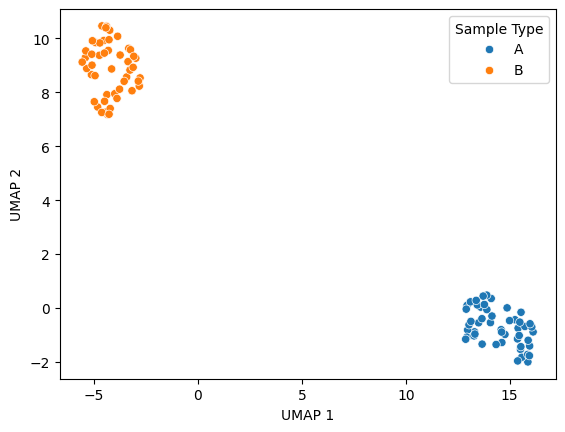

In [11]:
df_im = pd.DataFrame({"sample":dists_im.columns})
df_im["Sample Type"] = [i.split("_")[0].strip("_1234567890") for i in df_im["sample"]]
reducer = umap.UMAP(metric = "precomputed", random_state=0)
reduced = reducer.fit_transform(dists_im.values)
df_im["UMAP 1"] = reduced[:,0]
df_im["UMAP 2"] = reduced[:,1]
sns.scatterplot(df_im.sort_values("Sample Type"), x="UMAP 1", y="UMAP 2", hue = "Sample Type")

In [12]:
df_im.to_csv("SyntheticV1_UMAP_NOrbit_Image.csv")

## CTE

In [13]:
# Load cell type counts per neighborhood
results = pd.read_csv("/home/xiongb/Documents/NOrbitRevision/data/synthetic_mrf_neighborhoods_v1.csv")
results["Count"] = 1
results["image_neighborhood"] = results["Image"] + "_" + results["Neighborhood"]
results = pd.DataFrame(results.groupby(["Image","Neighborhood", "image_neighborhood","CellType"])["Count"].sum()).reset_index()
results = results.pivot(index= ["Image", "Neighborhood", "image_neighborhood"], columns = "CellType", values = "Count")
results = results.fillna(0)
results

CellType                                  0     1     2
Image Neighborhood image_neighborhood                  
A0    A1           A0_A1               2097  1356   876
      B2           A0_B2                805  1516   193
      C1           A0_C1                983   995  1356
A1    A1           A1_A1               2056  1195   795
      B2           A1_B2                960  1700   284
...                                     ...   ...   ...
B8    B1           B8_B1                968  1973   325
      C2           B8_C2                794   805  1099
B9    A2           B9_A2               1998  1250   868
      B1           B9_B1                828  1721   307
      C2           B9_C2                909   908  1211

[300 rows x 3 columns]

In [14]:
# Calculate pvalues for cell type enrichment
pvalues = np.zeros_like(results.values)

i = 0
for index, row in results.iterrows():
    result_sample = results[results.index.get_level_values(0) == index[0]]
    j=0
    for col in results.columns:
        tt = row[col]
        tf = np.sum(row.values)-row[col]
        ft = np.sum(result_sample[col])-row[col]
        ff = np.sum(result_sample.values)-np.sum(result_sample[col])-np.sum(row.values) + row[col]
        res = fisher_exact([[tt, tf], [ft, ff]], alternative='greater')
        adj = res.pvalue/(len(results)*len(results.columns))
        if adj != 0:
            pvalues[i][j] = -np.log10(adj)
        else:
            pvalues[i][j] = 309
#         pvalues[i][j] = (res.pvalue < 0.05/(len(results)*len(results.columns)))
        j+=1
    i+=1

In [15]:
# Calculate enrichment distance
dists_enriched = np.zeros((pvalues.shape[0],pvalues.shape[0]))
for i in range(pvalues.shape[0]):
    for j in range(pvalues.shape[0]):
        dists_enriched[i][j] = np.sum(np.abs(pvalues[i]-pvalues[j]))

In [16]:
dists_enriched = pd.DataFrame(dists_enriched, columns = list(results.index.get_level_values(2)), index=list(results.index.get_level_values(2)))

In [17]:
# Long version of distance matrix with pair labels
dists_enriched_long = {"Relationship": [], "Dist": [], "Neighborhood1 Type":[], "Neighborhood2 Type":[]}
for index, row in dists_enriched.iterrows():
    for col in dists_enriched.columns:
        if index > col:
            if index.split("_")[-1] == col.split("_")[-1]:
                dists_enriched_long["Relationship"].append("Same Distribution")
                dists_enriched_long["Dist"].append(row[col])
            elif index.split("_")[-1].strip("12") == col.split("_")[-1].strip("12"):
                dists_enriched_long["Relationship"].append("Same Marginal")
                dists_enriched_long["Dist"].append(row[col])
            else:
                dists_enriched_long["Relationship"].append("Different Marginal")
                dists_enriched_long["Dist"].append(row[col])
            dists_enriched_long["Neighborhood1 Type"].append(index.split("_")[1].strip("12"))
            dists_enriched_long["Neighborhood2 Type"].append(col.split("_")[1].strip("12"))
dists_enriched_long = pd.DataFrame(dists_enriched_long)

sameDist = dists_enriched_long[dists_enriched_long["Relationship"]=="Same Distribution"]["Dist"]
sameMarg = dists_enriched_long[dists_enriched_long["Relationship"]=="Same Marginal"]["Dist"]
diffMarg = dists_enriched_long[dists_enriched_long["Relationship"]=="Different Marginal"]["Dist"]
dists_enriched_long["Log Dist"] = np.log(dists_enriched_long["Dist"]+1)

In [18]:
dists_enriched_long.to_csv("SyntheticV1_AUROC_CTE.csv")

In [19]:
# AUROC for CTE overall
comp2 = dists_enriched_long[dists_enriched_long["Relationship"] != "Same Distribution"]

print(roc_auc_score((comp2["Relationship"]=="Same Marginal"),comp2["Dist"]))

dists_enriched_long = dists_enriched_long[dists_enriched_long["Relationship"] != "Different Marginal"]
dists_enriched_long["Neighborhood Type"] = dists_enriched_long["Neighborhood1 Type"]
print(roc_auc_score((dists_enriched_long["Relationship"]=="Same Marginal"),dists_enriched_long["Dist"]))
print(ttest_ind(sameDist,
                sameMarg,alternative="less"))
print(ttest_ind(sameMarg,
                diffMarg,alternative="less"))

1.3333333333333347e-07
0.533238984126984
TtestResult(statistic=-5.802095852411656, pvalue=3.34127834893723e-09, df=14848.0)
TtestResult(statistic=-474.41479486821413, pvalue=0.0, df=37498.0)


In [20]:
# AUROC for CTE by Neighborhood Class
for i in ["A","B","C"]:
    print(i)
    sameDist = dists_enriched_long[(dists_enriched_long["Relationship"]=="Same Distribution")&(dists_enriched_long["Neighborhood Type"]==i)]["Dist"]
    sameMarg = dists_enriched_long[(dists_enriched_long["Relationship"]=="Same Marginal")&(dists_enriched_long["Neighborhood Type"]==i)]["Dist"]
    filt = dists_enriched_long[(dists_enriched_long["Neighborhood Type"]==i)]
    print(roc_auc_score((filt["Relationship"]=="Same Marginal"),filt["Dist"]))
    print(ttest_ind(sameDist,
                sameMarg,alternative="less"))
    print(ttest_ind(sameMarg,
                diffMarg,alternative="less"))

A
0.515861469387755
TtestResult(statistic=-0.9623323124564664, pvalue=0.16796486404364563, df=4948.0)
TtestResult(statistic=-285.8615747969493, pvalue=0.0, df=32498.0)
B
0.5676250612244897
TtestResult(statistic=-7.090921573223588, pvalue=7.600199987852518e-13, df=4948.0)
TtestResult(statistic=-271.25234872611054, pvalue=0.0, df=32498.0)
C
0.5157626122448979
TtestResult(statistic=-1.667960916869042, pvalue=0.04769338070909502, df=4948.0)
TtestResult(statistic=-276.52370210635337, pvalue=0.0, df=32498.0)


In [21]:
# Get umap visualizaton for CTE
import umap
df_enriched = pd.DataFrame({"full":dists_enriched.columns})
df_enriched["sample"] = [i.split("_")[0] for i in dists_enriched.columns]
df_enriched["neighborhood"] = [i.split("_")[1] for i in dists_enriched.columns]
df_enriched["image_neigborhood"] = df_enriched["sample"] + "_" + df_enriched["neighborhood"]
df_enriched
reducer = umap.UMAP(metric = "precomputed", random_state=0)
reduced = reducer.fit_transform(dists_enriched.values)
df_enriched["UMAP 1"] = reduced[:,0]
df_enriched["UMAP 2"] = reduced[:,1]

/home/xiongb/.local/lib/python3.10/site-packages/umap/umap_.py:1857: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/home/xiongb/.local/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [22]:
df_enriched.to_csv("SyntheticV1_UMAP_CTE.csv")

### Image

In [23]:
# Compile cell type counts for images
results = pd.read_csv("/home/xiongb/Documents/NOrbitRevision/data/synthetic_mrf_neighborhoods_v1.csv")
results["Count"] = 1
results["image_neighborhood"] = results["Image"] + "_" + results["Neighborhood"]
results = pd.DataFrame(results.groupby(["Image","CellType"])["Count"].sum()).reset_index()
results = results.pivot(index= ["Image"], columns = "CellType", values = "Count")
results = results.fillna(0)

neighborhood_list = sorted(set(dists_enriched.columns))

neighborhoodDF = pd.DataFrame({"image_neighborhood":neighborhood_list})
neighborhoodDF["image"] = ["_".join(i.split("_")[:-1]) for i in neighborhood_list]
neighborhoodDF["neighborhood"] = [i.split("_")[-1] for i in neighborhood_list]
images = sorted(set(neighborhoodDF["image"]))

In [24]:
# Image level cell type enrichments
pvalues = np.zeros_like(results.values)

i = 0
for index, row in results.iterrows():
    j=0
    for col in results.columns:
        tt = row[col]
        tf = np.sum(row.values)-row[col]
        ft = np.sum(results[col])
        ff = np.sum(results.values)-tt-tf-ft
        res = fisher_exact([[tt, tf], [ft, ff]], alternative='greater')
        adj = res.pvalue/(len(results)*len(results.columns))
        if adj != 0:
            pvalues[i][j] = -np.log10(adj)
            print(-np.log10(adj))
        else:
            pvalues[i][j] = 309
#         pvalues[i][j] = (res.pvalue < 0.05/(len(results)*len(results.columns)))
        j+=1
    i+=1

2.7787529445449333
2.4799717149244014
2.93265765928293
3.2623645205279987
2.481652752396202
2.5659835534982673
2.723535538502143
2.5115393246089663
2.6341115654193414
3.1981717114842056
2.4772962487376766
2.959025337592248
2.7846913607491786
2.5850274853026054
2.5029222194944944
3.059935470377202
2.530688354926351
2.49231940545493
2.8894609488206493
2.5032310902819774
2.553322575576033
3.790764661107029
2.5004055778549708
2.4805439577159945
2.480216392981119
2.8306125527904396
2.8626301427200604
3.84094937270027
2.4886634403042818
2.484362471395471
2.854383592318315
2.574387351560838
2.499882722330222
2.81695456863422
2.4966094889856283
2.623864497012249
4.641630665418832
2.477121254727836
4.492195850338072
4.302212693036512
2.477173184889486
2.6029911252181703
3.126953113010261
2.5706943792240464
2.4816165684800935
2.7442455970757003
2.575585567663178
2.519263229870993
2.4850142002899878
5.179386012388558
2.4773304604378814
3.081222941484924
3.133152692711389
2.4771299109169904
3.5894

In [25]:
dists_enriched = np.zeros((pvalues.shape[0],pvalues.shape[0]))
for i in range(pvalues.shape[0]):
    for j in range(pvalues.shape[0]):
        dists_enriched[i][j] = np.sum(np.abs(pvalues[i]-pvalues[j]))
dists_enriched = pd.DataFrame(dists_enriched, columns = results.index, index=results.index)

In [26]:
# Long version of distance dataframe
dists_enriched_long = {"Relationship": [], "Dist": [], "Sample1 Type":[], "Sample2 Type":[]}
for index, row in dists_enriched.iterrows():
    for col in dists_enriched.columns:
        if index > col:
            if index.split("_")[-1] == col.split("_")[-1]:
                dists_enriched_long["Relationship"].append("Same Distribution")
                dists_enriched_long["Dist"].append(row[col])
            elif index.split("_")[-1].strip("12") == col.split("_")[-1].strip("12"):
                dists_enriched_long["Relationship"].append("Same Marginal")
                dists_enriched_long["Dist"].append(row[col])
            else:
                dists_enriched_long["Relationship"].append("Different Marginal")
                dists_enriched_long["Dist"].append(row[col])
            dists_enriched_long["Sample1 Type"].append(index.strip("1234567890"))
            dists_enriched_long["Sample2 Type"].append(col.strip("1234567890"))
dists_enriched_long = pd.DataFrame(dists_enriched_long)

sameDist = dists_enriched_long[dists_enriched_long["Relationship"]=="Same Distribution"]["Dist"]
sameMarg = dists_enriched_long[dists_enriched_long["Relationship"]=="Same Marginal"]["Dist"]
diffMarg = dists_enriched_long[dists_enriched_long["Relationship"]=="Different Marginal"]["Dist"]
        

/home/xiongb/.local/lib/python3.10/site-packages/umap/umap_.py:1857: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/home/xiongb/.local/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<AxesSubplot: xlabel='UMAP 1', ylabel='UMAP 2'>

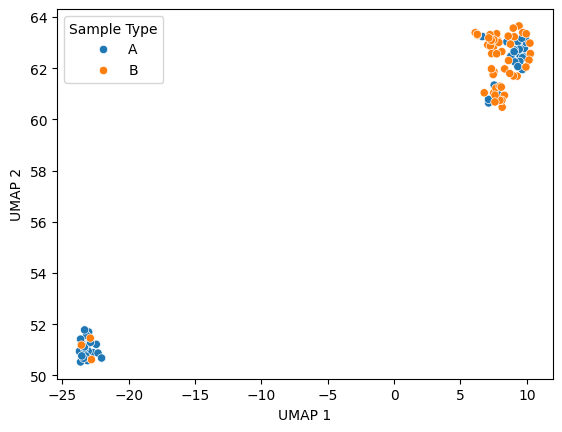

In [27]:
# UMAP viz for Image-Level CTE
import umap
df_im = pd.DataFrame({"sample":dists_enriched.columns})
df_im["Sample Type"] = [i.split("_")[0].strip("1234567890") for i in df_im["sample"]]
reducer = umap.UMAP(metric = "precomputed",random_state=0)
reduced = reducer.fit_transform(dists_enriched.values)
df_im["UMAP 1"] = reduced[:,0]
df_im["UMAP 2"] = reduced[:,1]
sns.scatterplot(df_im.sort_values("Sample Type"), x="UMAP 1", y="UMAP 2", hue = "Sample Type")

In [28]:
df_im.to_csv("SyntheticV1_UMAP_CTE_Image.csv")